### Problem Statement:

**Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on.**

  **1. Time of purchase patterns (making sure last-minute purchases are expensive).**
  
  **2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases).**
  
**So, we work on a project where we collect data of flight fares with other features and work to make a model to predict fares of flights.**

### Importing Required Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import datetime
import klib as kl
from sklearn.preprocessing import StandardScaler, PowerTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Arya\Desktop\Data cv\Flight Data.csv")
df.head()

,Unnamed: 0,Airline,DepartureTime,ArrivalTime,DepLocation,ArrLocation,Stops,Duration,Price
0,0,Air Asia,6:40,6:20,New Delhi,New Delhi,1.0,11:40,5953.0
1,1,Go First,9:30,11:35,Mumbai,Mumbai,1.0,2:05,5954.0
2,2,Go First,10:45,0:50,New Delhi,New Delhi,1.0,2:05,5954.0
3,3,Go First,5:45,10:25,Mumbai,Mumbai,1.0,4:40,5954.0
4,4,Vistara,5:45,8:05,New Delhi,New Delhi,1.0,2:20,6375.0


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (2171, 9)


### Checking for Null values

In [4]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


Unnamed: 0          0
Airline          1302
DepartureTime    1293
ArrivalTime      1727
DepLocation      1403
ArrLocation      1403
Stops            1829
Duration         1730
Price            1736
dtype: int64



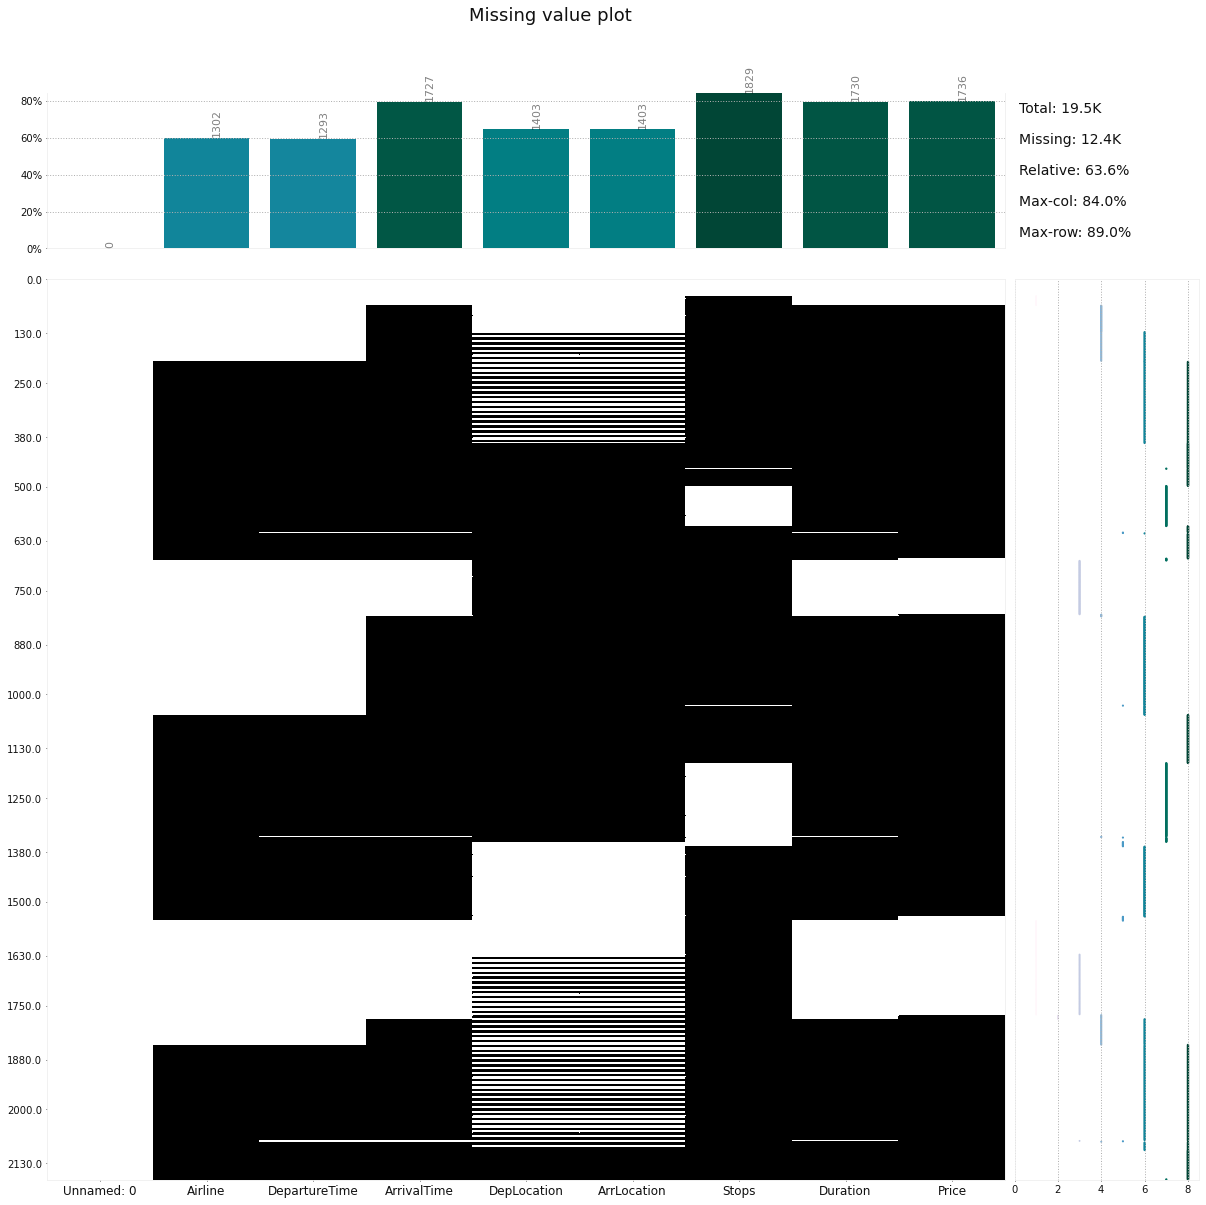

In [5]:
kl.missingval_plot(df) # returns a figure containing information about missing values
plt.tight_layout()

#### There is null value in our dataset

### Information about dataset

In [6]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2171 non-null   int64  
 1   Airline        869 non-null    object 
 2   DepartureTime  878 non-null    object 
 3   ArrivalTime    444 non-null    object 
 4   DepLocation    768 non-null    object 
 5   ArrLocation    768 non-null    object 
 6   Stops          342 non-null    float64
 7   Duration       441 non-null    object 
 8   Price          435 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 152.8+ KB
None


#### Categorical data present in our data set

### Checking For Duplicate

In [7]:
duplicate = df[df.duplicated()]
print('==========================================================================')
print("Duplicate Rows :\n\n",duplicate)
print('==========================================================================')

Duplicate Rows :

 Empty DataFrame
Columns: [Unnamed: 0, Airline, DepartureTime, ArrivalTime, DepLocation, ArrLocation, Stops, Duration, Price]
Index: []


#### There is no duplicate data in our dataset

### Drop Unwanted Column

In [8]:
df = df.drop('Unnamed: 0', axis = 1)
df.head(2)

,Airline,DepartureTime,ArrivalTime,DepLocation,ArrLocation,Stops,Duration,Price
0,Air Asia,6:40,6:20,New Delhi,New Delhi,1.0,11:40,5953.0
1,Go First,9:30,11:35,Mumbai,Mumbai,1.0,2:05,5954.0


### Handling Missing Value

In [9]:
df = df.apply(lambda x:x.fillna(x.median())if x.dtype == 'float64' else x.fillna(x.value_counts().index[0]))
print('================================\n')
print(df.isnull().sum())
print('\n================================')


Airline          0
DepartureTime    0
ArrivalTime      0
DepLocation      0
ArrLocation      0
Stops            0
Duration         0
Price            0
dtype: int64



#### There is no null value left in our dataset

### Features Engineering

### Converting Departure Time into Minutes and Adding Year and Months Column

In [10]:
df['DepartureTime']= df['DepartureTime'].replace(['18:40\nAir Asia'],' ')
df['DepartureTime'].dtype

dtype('O')

In [11]:
df['DepartureTime'] = pd.to_datetime(df['DepartureTime'])
df['Year'] = df['DepartureTime'].dt.year
df['Months'] = df['DepartureTime'].dt.month
df['Year'] = df['Year'].astype('int')
df['Months'] = df['Months'].astype('int')
df['DepTime'] = df['DepartureTime'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)/60
df.head(2)

,Airline,DepartureTime,ArrivalTime,DepLocation,ArrLocation,Stops,Duration,Price,Year,Months,DepTime
0,Air Asia,2021-10-30 06:40:00,6:20,New Delhi,New Delhi,1.0,11:40,5953.0,2021,10,400.0
1,Go First,2021-10-30 09:30:00,11:35,Mumbai,Mumbai,1.0,2:05,5954.0,2021,10,570.0


### Converting Arrival Time into Minutes

In [12]:
df['ArrivalTime']= df['ArrivalTime'].str.strip()
df['ArrivalTime'].head(2)

0     6:20
1    11:35
Name: ArrivalTime, dtype: object

In [13]:
df['ArrMin'] = df['ArrivalTime'].str[-2:]
df['ArrMin'] = df['ArrMin'].astype('int')
df.head(2)

,Airline,DepartureTime,ArrivalTime,DepLocation,ArrLocation,Stops,Duration,Price,Year,Months,DepTime,ArrMin
0,Air Asia,2021-10-30 06:40:00,6:20,New Delhi,New Delhi,1.0,11:40,5953.0,2021,10,400.0,20
1,Go First,2021-10-30 09:30:00,11:35,Mumbai,Mumbai,1.0,2:05,5954.0,2021,10,570.0,35


In [14]:
df['ArrHr'] = df['ArrivalTime'].str[0:1]
df['ArrHr'] = df['ArrHr'].astype('int')
df.head(2)

,Airline,DepartureTime,ArrivalTime,DepLocation,ArrLocation,Stops,Duration,Price,Year,Months,DepTime,ArrMin,ArrHr
0,Air Asia,2021-10-30 06:40:00,6:20,New Delhi,New Delhi,1.0,11:40,5953.0,2021,10,400.0,20,6
1,Go First,2021-10-30 09:30:00,11:35,Mumbai,Mumbai,1.0,2:05,5954.0,2021,10,570.0,35,1


In [15]:
df['ArrTime'] = df['ArrHr']*60 + df['ArrMin']
df.head(2)

,Airline,DepartureTime,ArrivalTime,DepLocation,ArrLocation,Stops,Duration,Price,Year,Months,DepTime,ArrMin,ArrHr,ArrTime
0,Air Asia,2021-10-30 06:40:00,6:20,New Delhi,New Delhi,1.0,11:40,5953.0,2021,10,400.0,20,6,380
1,Go First,2021-10-30 09:30:00,11:35,Mumbai,Mumbai,1.0,2:05,5954.0,2021,10,570.0,35,1,95


### Converting Duration Time into Minutes

In [16]:
df['Duration'] = df['Duration'].apply(lambda x: pd.Period(x, freq='ms'))

In [17]:
df['DurTime'] = df['Duration'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)/60
df.head(2)

,Airline,DepartureTime,ArrivalTime,DepLocation,ArrLocation,Stops,Duration,Price,Year,Months,DepTime,ArrMin,ArrHr,ArrTime,DurTime
0,Air Asia,2021-10-30 06:40:00,6:20,New Delhi,New Delhi,1.0,0001-01-01 11:40:00.000,5953.0,2021,10,400.0,20,6,380,700.0
1,Go First,2021-10-30 09:30:00,11:35,Mumbai,Mumbai,1.0,0001-01-01 02:05:00.000,5954.0,2021,10,570.0,35,1,95,125.0


### Drop Unwanted Column

In [18]:
df = df.drop(['Duration','DepartureTime','ArrivalTime'], axis = 1)
df.head(2)

,Airline,DepLocation,ArrLocation,Stops,Price,Year,Months,DepTime,ArrMin,ArrHr,ArrTime,DurTime
0,Air Asia,New Delhi,New Delhi,1.0,5953.0,2021,10,400.0,20,6,380,700.0
1,Go First,Mumbai,Mumbai,1.0,5954.0,2021,10,570.0,35,1,95,125.0


### Analysis of Data

### Airline column

In [19]:
ar = df['Airline'].value_counts()
ar

Go First     1523
Vistara       197
IndiGo        186
Air India     107
SpiceJet       88
Air Asia       70
Name: Airline, dtype: int64

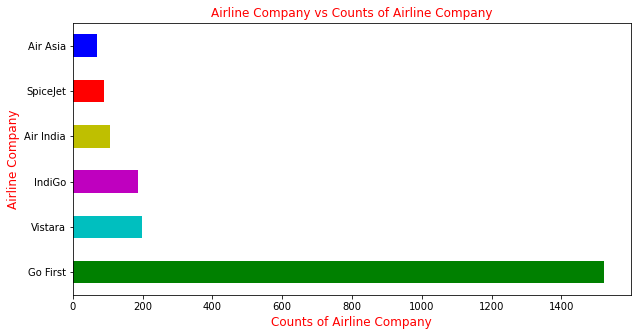

In [20]:
ar.plot.barh(figsize = (10,5), color = ['g','c', 'm', 'y','r','b'])
plt.ylabel('Airline Company', c = 'r', fontsize = 12)
plt.xlabel('Counts of Airline Company', c = 'r', fontsize = 12 )
plt.title('Airline Company vs Counts of Airline Company', c = 'r', fontsize = 12)
plt.show()

#### Above plot shows Go First has highest and Air Asia has lowest flight counts

In [21]:
air = df.groupby('Airline')['Price'].sum().sort_values()
air

Airline
Air Asia       524728.0
SpiceJet       611819.0
Air India      815048.0
IndiGo        1308737.0
Vistara       1965570.0
Go First     11368096.0
Name: Price, dtype: float64

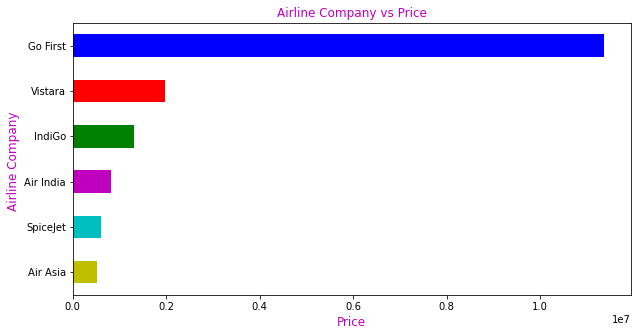

In [22]:
air.plot.barh(figsize = (10,5),color = ['y','c', 'm', 'g','r','b'])
plt.ylabel('Airline Company ', c = 'm', fontsize = 12)
plt.xlabel('Price', c = 'm', fontsize = 12 )
plt.title('Airline Company vs Price', c = 'm', fontsize = 12)
plt.show()

#### Above plot shows Go First has highest Price

### Departure Location

In [23]:
df['DepLocation'].value_counts()

Goa          1775
Mumbai        333
New Delhi      63
Name: DepLocation, dtype: int64

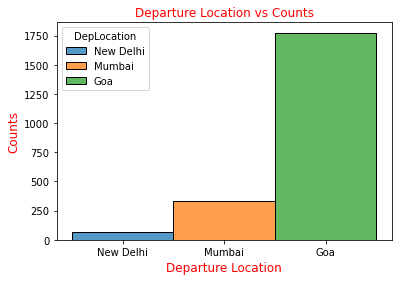

In [24]:
sns.histplot(binwidth=0.5, x="DepLocation", hue="DepLocation", data=df, stat="count", multiple="stack")
plt.xlabel('Departure Location', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12)
plt.title('Departure Location vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Goa has highest count

In [25]:
dep = df.groupby('DepLocation')['Price'].sum()
dep

DepLocation
Goa          13515849.0
Mumbai        2480400.0
New Delhi      597749.0
Name: Price, dtype: float64

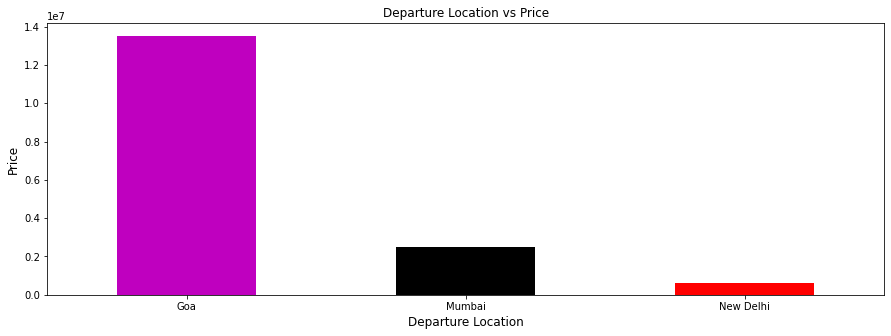

In [26]:
dep.plot.bar(figsize = (15, 5),rot = 360, color = ['m','k','r','g','c','y'])
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Departure Location', fontsize = 12 )
plt.title('Departure Location vs Price', c = 'k', fontsize = 12)
plt.show()

#### Goa has highest price of ticket

### Arrival Location

In [27]:
df['ArrLocation'].value_counts()

Goa          1775
Mumbai        333
New Delhi      63
Name: ArrLocation, dtype: int64

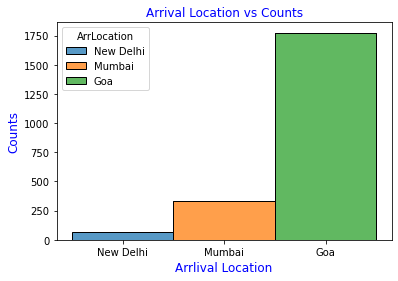

In [28]:
sns.histplot(binwidth=0.5, x="ArrLocation", hue="ArrLocation", data=df, stat="count", multiple="stack")
plt.xlabel('Arrlival Location', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Arrival Location vs Counts', c = 'b', fontsize = 12)
plt.show()

#### Goa has highest count

### Duration Column

In [29]:
df['DurTime'].value_counts()

75.0     1749
80.0       11
160.0      11
85.0       11
325.0      10
         ... 
62.0        1
185.0       1
670.0       1
375.0       1
255.0       1
Name: DurTime, Length: 118, dtype: int64

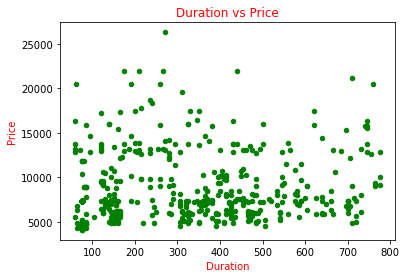

In [30]:
df.plot.scatter(x = 'DurTime', y = 'Price', c = 'g')
plt.xlabel('Duration', c = 'r')
plt.ylabel('Price', c = 'r')
plt.title('Duration vs Price', c = 'r')
plt.show()

#### Above plot shows range 200 to 300 min has highes price 

### Encodinng Categorical columns

In [31]:
le = LabelEncoder()

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i].values.reshape(-1,1))
        
df.head(2)

,Airline,DepLocation,ArrLocation,Stops,Price,Year,Months,DepTime,ArrMin,ArrHr,ArrTime,DurTime
0,0,2,2,1.0,5953.0,2021,10,400.0,20,6,380,700.0
1,2,1,1,1.0,5954.0,2021,10,570.0,35,1,95,125.0


### Data distribution

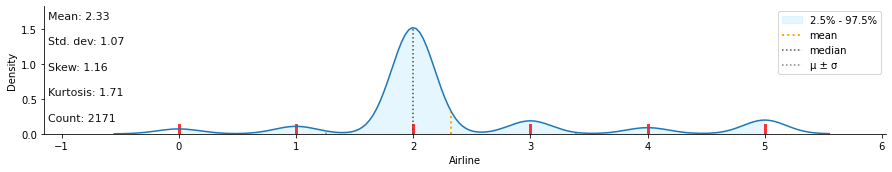

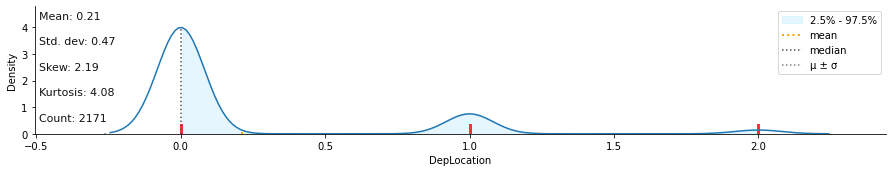

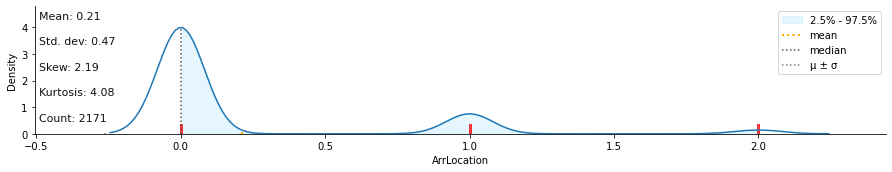

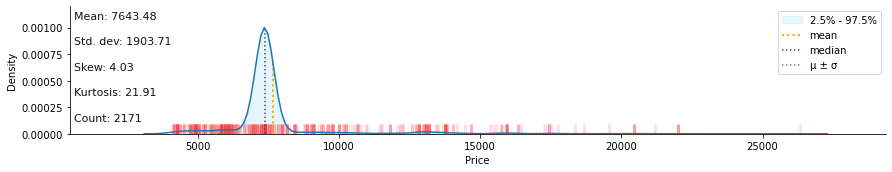

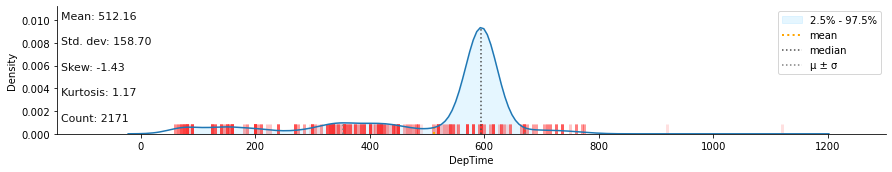

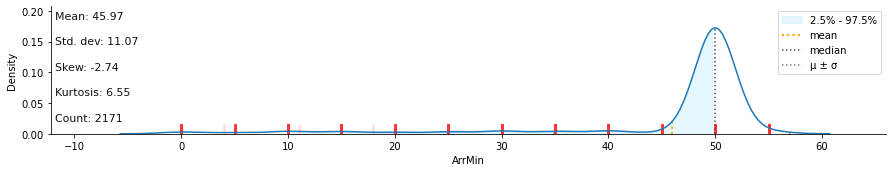

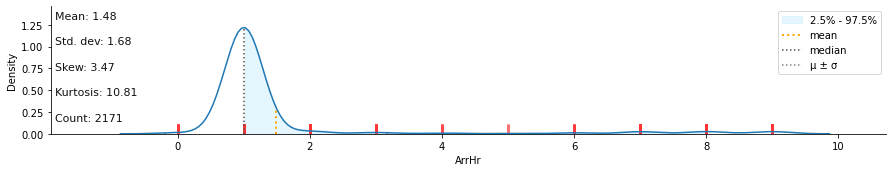

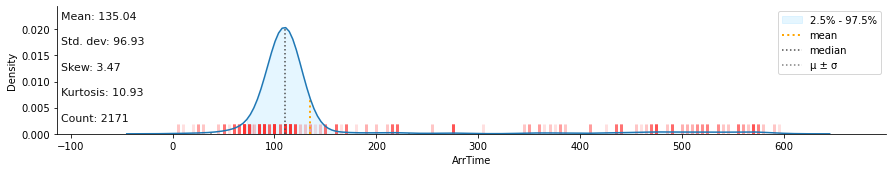

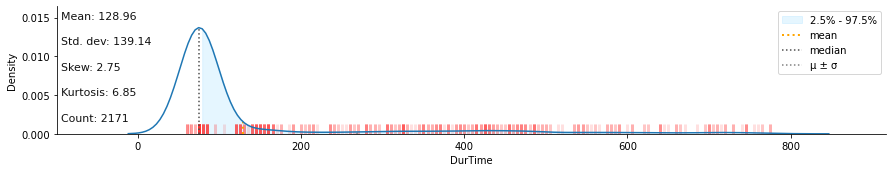

In [32]:
kl.dist_plot(df) # returns a distribution plot for every numeric feature
plt.tight_layout()

#### Data is skewed

### Correlatioin Featue vs Lable usin Heat Map

In [33]:
kl.corr_mat(df) # returns a color-encoded correlation matrix

,Airline,DepLocation,ArrLocation,Stops,Price,Year,Months,DepTime,ArrMin,ArrHr,ArrTime,DurTime
Airline,1.00,0.10,0.10,-0.05,0.27,-,-,-0.26,-0.11,0.13,0.13,0.22
DepLocation,0.10,1.00,1.00,-0.05,0.09,-,-,-0.03,-0.15,0.03,0.02,0.05
ArrLocation,0.10,1.00,1.00,-0.05,0.09,-,-,-0.03,-0.15,0.03,0.02,0.05
Stops,-0.05,-0.05,-0.05,1.00,-0.02,-,-,0.09,0.06,-0.05,-0.04,-0.07
Price,0.27,0.09,0.09,-0.02,1.00,-,-,-0.03,-0.14,0.00,-0.02,0.29
Year,-,-,-,-,-,-,-,-,-,-,-,-
Months,-,-,-,-,-,-,-,-,-,-,-,-
DepTime,-0.26,-0.03,-0.03,0.09,-0.03,-,-,1.00,0.30,-0.36,-0.35,-0.32
ArrMin,-0.11,-0.15,-0.15,0.06,-0.14,-,-,0.30,1.00,-0.42,-0.32,-0.56
ArrHr,0.13,0.03,0.03,-0.05,0.00,-,-,-0.36,-0.42,1.00,0.99,0.43


-----------
Heat Map :-
-----------


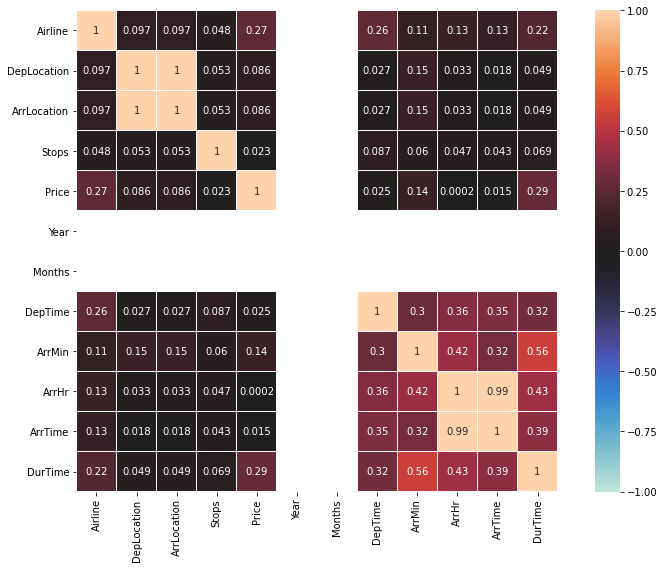

In [34]:
print('-----------')
print('Heat Map :-')
print('-----------')
df_corr = df.corr().abs()

plt.figure(figsize = (11,8))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

#### Arrival Location has highest correlation

### Checking skewnes

In [35]:
df.skew()

Airline        1.163081
DepLocation    2.193081
ArrLocation    2.193081
Stops          5.341912
Price          4.036161
Year           0.000000
Months         0.000000
DepTime       -1.430982
ArrMin        -2.738249
ArrHr          3.471916
ArrTime        3.470124
DurTime        2.752484
dtype: float64

### Spliting Dataset into features and label

In [36]:
x = df.drop('Price', axis = 1)
y = df. Price
print('Data has been splited')

Data has been splited


### Power Transformer to remove outliers

In [37]:
Pt = PowerTransformer(method = 'yeo-johnson')
x = Pt.fit_transform(x)
x

array([[-3.03433174,  2.13326396,  2.13326396, ...,  2.55075056,
         2.55061749,  2.19412982],
       [-0.22138307,  2.11408987,  2.11408987, ..., -0.19943022,
        -0.54233555,  1.7139    ],
       [-0.22138307,  2.13326396,  2.13326396, ..., -6.53420005,
        -2.44110621,  1.7139    ],
       ...,
       [-0.22138307, -0.47233102, -0.47233102, ..., -0.19943022,
        -0.15426258, -0.45141622],
       [-0.22138307, -0.47233102, -0.47233102, ..., -0.19943022,
        -0.15426258, -0.45141622],
       [-0.22138307, -0.47233102, -0.47233102, ..., -0.19943022,
        -0.15426258, -0.45141622]])

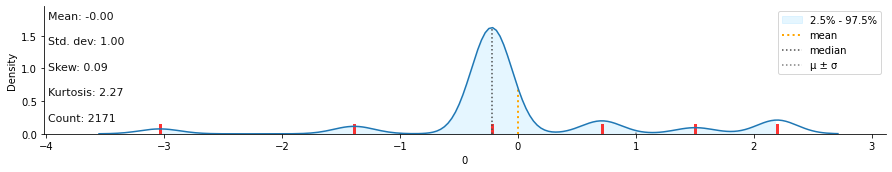

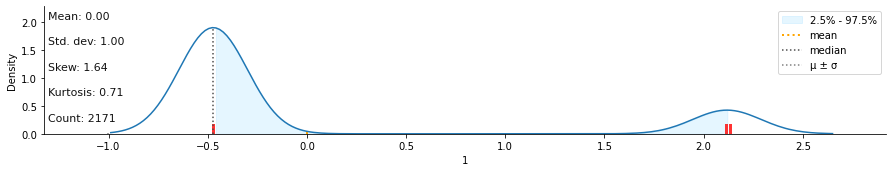

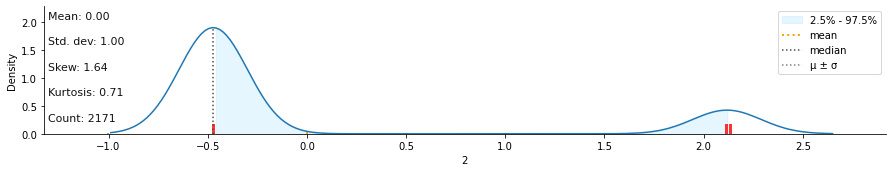

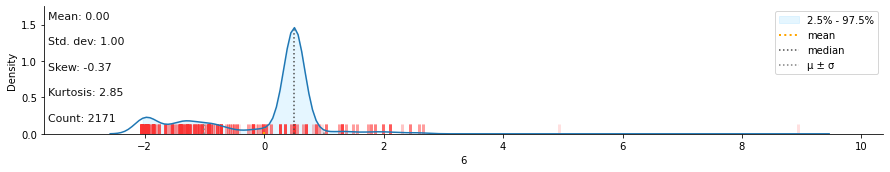

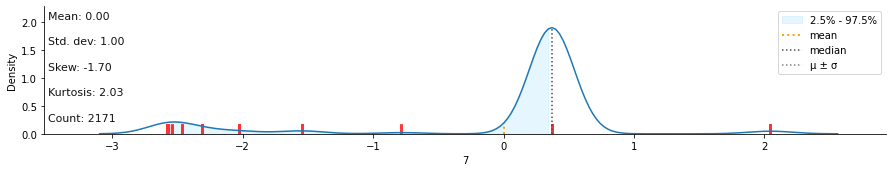

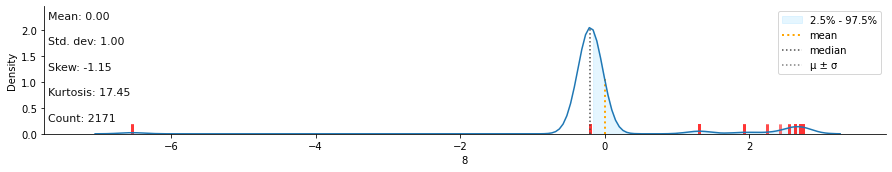

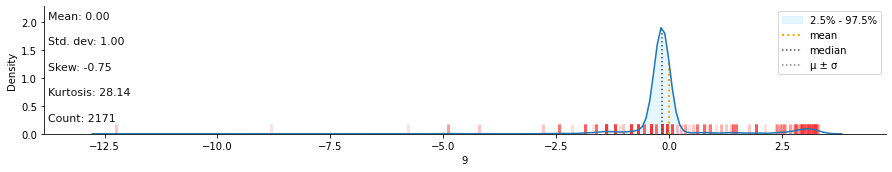

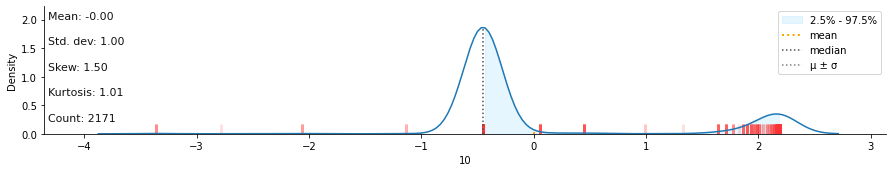

In [38]:
kl.dist_plot(x) # returns a distribution plot for every numeric feature
plt.tight_layout()

#### Skewnss has been removed

### Split data into train and test. Model will be bulit on training data and tested on test data

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Bulding

### Decision Tree model instantiaing, training and evaluating

In [40]:
bag_dt = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [41]:
bag_dt.oob_score

True

In [42]:
bag_dt.fit(x_train, y_train)
print('Bagging DT score ------->', bag_dt.score(x_test, y_test))

Bagging DT score -------> 0.5852295453574963


In [43]:
y_pred = bag_dt.predict(x_test)

In [44]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', bag_dt.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.5852295453574963
RMSE of Model -------> 1128.842785601684
MSE of Model -------> 1274286.0346049697
Score of test data ----> 0.5852295453574963


#### Conclusion : Decision Tree model has 58% score

### XGBoost model instantiaing, training and evaluating

In [45]:
bag_xgb = BaggingRegressor(xgb.XGBRegressor(eval_metric = 'mlogloss'), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [46]:
bag_xgb.oob_score

True

In [47]:
bag_xgb.fit(x_train, y_train)
print('Bagging XGBoost score ------->', bag_xgb.score(x_test, y_test))

Bagging XGBoost score -------> 0.5880606397063173


In [48]:
y_pred = bag_xgb.predict(x_test)

In [49]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', bag_xgb.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.5880606397063173
RMSE of Model -------> 1124.9836237753664
MSE of Model -------> 1265588.153762755
Score of test data ----> 0.5880606397063173


#### Conclusion : XGBoost model has 58% score

### Knn model instantiaing, training and evaluating

In [50]:
bag_Knn = BaggingRegressor(KNeighborsRegressor(n_neighbors = 5), n_estimators = 20, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [51]:
bag_Knn.oob_score

True

In [52]:
bag_Knn.fit(x_train, y_train)
print('Bagging KNN score ------->', bag_Knn.score(x_test, y_test))

Bagging KNN score -------> 0.20544620871321506


In [53]:
y_pred = bag_dt.predict(x_test)

In [54]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', bag_Knn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.5852295453574963
RMSE of Model -------> 1128.842785601684
MSE of Model -------> 1274286.0346049697
Score of test data ----> 0.20544620871321506


#### Conclusion : KNN model has 58% score

### Random Forest model instantiaing, training and evaluating

In [55]:
bag_Rn = BaggingRegressor(RandomForestRegressor(), n_estimators = 50, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [56]:
bag_Rn.oob_score

True

In [57]:
bag_Rn.fit(x_train, y_train)
print('Bagging Random Forest score ------->', bag_Rn.score(x_test, y_test))

Bagging Random Forest score -------> 0.5606633754822099


In [58]:
y_pred = bag_Rn.predict(x_test)

In [59]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', bag_Rn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.5606633754822099
RMSE of Model -------> 1161.7916743257404
MSE of Model -------> 1349759.8945326072
Score of test data ----> 0.5606633754822099


#### Conclusion : Random Forest model has 56% score

### Looking RMSE score we found XGBoost has best model so we do Hyperparameter Tuning on it

In [60]:
param = {'n_estimators': [50,100,150], 'max_samples': [1.0], 'bootstrap': [True]}

In [61]:
grid_search = GridSearchCV(estimator = bag_xgb, param_grid = param, cv = 5 , n_jobs = -1)

In [62]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=XGBRegressor(base_score=None,
                                                                    booster=None,
                                                                    colsample_bylevel=None,
                                                                    colsample_bynode=None,
                                                                    colsample_bytree=None,
                                                                    eval_metric='mlogloss',
                                                                    gamma=None,
                                                                    gpu_id=None,
                                                                    importance_type='gain',
                                                                    interaction_constraints=None,
                                                                    learning_rate=None,
         

In [63]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 150}


In [64]:
hxgb = BaggingRegressor(base_estimator=xgb.XGBRegressor(),max_samples = 1.0, bootstrap = True , n_estimators = 150)
hxgb.fit(x_train, y_train)
hxgb.score(x_test, y_test)

0.5589587120579804

In [65]:
y_pred = hxgb.predict(x_test)

In [66]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', hxgb.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.5589587120579804
RMSE of Model -------> 1164.04341739637
MSE of Model -------> 1354997.0775838196
Score of test data ----> 0.5589587120579804


### Saving The Model

In [67]:
# saving the model to the Local file system
filename = 'Flight Price Prediction Flip Robo.pickle'
pickle.dump(hxgb, open(filename, 'wb'))

### Predict Flight Price 

In [68]:
model = pickle.load(open('Flight Price Prediction Flip Robo.pickle', 'rb'))
Prediction = pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Orginal'])
Prediction

,0,1,2,3,4,5,6,7,8,9,...,533,534,535,536,537,538,539,540,541,542
Predicted,7330.092285,7330.092285,7330.092285,7330.092285,8563.883789,7330.092285,7330.092285,7330.092285,7330.092285,7330.092285,...,7371.537598,7356.291016,7330.092285,7330.092285,7368.286621,7371.214355,7330.092285,8734.50293,7330.092285,17008.365234
Orginal,7359.000000,7359.000000,7359.000000,7359.000000,7953.000000,7359.000000,7359.000000,7359.000000,7359.000000,7359.000000,...,7359.000000,7359.000000,7359.000000,7359.000000,7359.000000,7359.000000,7359.000000,7359.00000,7359.000000,12978.000000


### Saving the predicted result into CSV file

In [69]:
Prediction.to_csv('Flight Price Prediction Flip Robo.csv')

## Final Conclusion : XGBoost is our best model.